In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# LATENT AUTOREGRESSIVE MODEL

recurrent neural networks (RNNs)
are designed to better handle sequential information. RNNs introduce state variables to store past
information, together with the current inputs, to determine the current outputs.

###  Trying for small subset

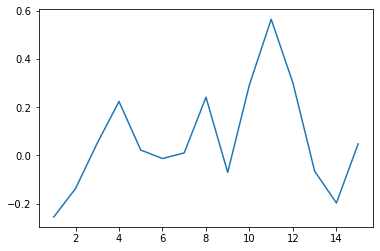

In [2]:
T =15
time = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.2, (T,))

plt.plot(time, x)
plt.grid = True
plt.show()

In [3]:
time

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15.])

In [4]:
torch.normal(0, 0.2, (T,)).shape

torch.Size([15])

In [5]:
torch.sin(0.01 * time).shape

torch.Size([15])

In [6]:
x

tensor([-0.2555, -0.1380,  0.0509,  0.2236,  0.0220, -0.0132,  0.0102,  0.2413,
        -0.0705,  0.2933,  0.5649,  0.3006, -0.0659, -0.1975,  0.0475])

Next, we need to turn such a sequence into features and labels that our model can train on. Based
on the embedding dimension τ we map the data into pairs yt = xt and xt = [xt−τ , . . . , xt−1]. The
astute reader might have noticed that this gives us τ fewer data examples, since we do not have
sufficient history for the first τ of them. A simple fix, in particular if the sequence is long, is to
discard those few terms. Alternatively we could pad the sequence with zeros. Here we only use
the first 600 feature-label pairs for training.

In [7]:
tau = 4
features = torch.zeros((T-tau, tau))

In [8]:
features.shape, features

(torch.Size([11, 4]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [9]:
for i in range(tau):
    features[:, i] = x[i:T- tau+ i]
    print("iteration :", i, " :\n", features)
    
    # its a strange way to build up the features


iteration : 0  :
 tensor([[-0.2555,  0.0000,  0.0000,  0.0000],
        [-0.1380,  0.0000,  0.0000,  0.0000],
        [ 0.0509,  0.0000,  0.0000,  0.0000],
        [ 0.2236,  0.0000,  0.0000,  0.0000],
        [ 0.0220,  0.0000,  0.0000,  0.0000],
        [-0.0132,  0.0000,  0.0000,  0.0000],
        [ 0.0102,  0.0000,  0.0000,  0.0000],
        [ 0.2413,  0.0000,  0.0000,  0.0000],
        [-0.0705,  0.0000,  0.0000,  0.0000],
        [ 0.2933,  0.0000,  0.0000,  0.0000],
        [ 0.5649,  0.0000,  0.0000,  0.0000]])
iteration : 1  :
 tensor([[-0.2555, -0.1380,  0.0000,  0.0000],
        [-0.1380,  0.0509,  0.0000,  0.0000],
        [ 0.0509,  0.2236,  0.0000,  0.0000],
        [ 0.2236,  0.0220,  0.0000,  0.0000],
        [ 0.0220, -0.0132,  0.0000,  0.0000],
        [-0.0132,  0.0102,  0.0000,  0.0000],
        [ 0.0102,  0.2413,  0.0000,  0.0000],
        [ 0.2413, -0.0705,  0.0000,  0.0000],
        [-0.0705,  0.2933,  0.0000,  0.0000],
        [ 0.2933,  0.5649,  0.0000,  0.0000

In [10]:
labels = x[tau:].reshape((-1,1))

In [11]:
labels

tensor([[ 0.0220],
        [-0.0132],
        [ 0.0102],
        [ 0.2413],
        [-0.0705],
        [ 0.2933],
        [ 0.5649],
        [ 0.3006],
        [-0.0659],
        [-0.1975],
        [ 0.0475]])

In [12]:
torch.zeros((T-tau, tau)).shape

torch.Size([11, 4])

In [13]:
x[1:T-4+1].shape

torch.Size([11])

### Okay,
so what we are essentially doing is in a series we are trying to select a particular numbe rof values (tau) and then the next number is put as the label

### Training more data
for real

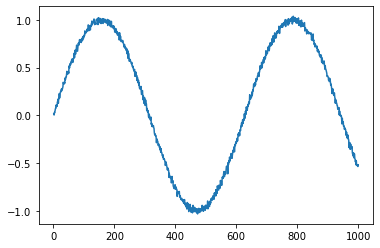

In [14]:
# generating data
T = 1000
t = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * t) + torch.normal(0,0.02, (T,))
plt.plot(t,x)
plt.show()

In [15]:
#x.sum()
#x

In [16]:
# making features and labels
tau=4
features = torch.zeros(T-tau, tau)

In [17]:
labels = torch.zeros(len(x)-tau)
labels.shape
    

torch.Size([996])

### Lets try a different way of generating features and labels

In [18]:
for i in range(len(x)-tau):
    features[i,:] = x[i:i+tau]
    labels[i] = x[i+tau]

In [19]:
features.shape, labels.shape

(torch.Size([996, 4]), torch.Size([996]))

In [20]:
features[0:5], labels[0:5]

(tensor([[0.0165, 0.0032, 0.0311, 0.0267],
         [0.0032, 0.0311, 0.0267, 0.0484],
         [0.0311, 0.0267, 0.0484, 0.0630],
         [0.0267, 0.0484, 0.0630, 0.0759],
         [0.0484, 0.0630, 0.0759, 0.0755]]),
 tensor([0.0484, 0.0630, 0.0759, 0.0755, 0.1094]))

In [21]:
labels = labels.reshape(-1,1)
labels[:5,:]

tensor([[0.0484],
        [0.0630],
        [0.0759],
        [0.0755],
        [0.1094]])

In [22]:
batch_size = 16
n_train = 600

train_dataset = torch.utils.data.TensorDataset(*(features[:n_train], labels[:n_train]))
train_iter = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

test_dataset = torch.utils.data.TensorDataset(*(features[n_train:], labels[n_train:]))
test_iter = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

In [23]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [24]:
def get_net():
    net = nn.Sequential(nn.Linear(4,10), nn.ReLU(), nn.Linear(10,1))
    net.apply(init_weights)
    return net

In [25]:
loss = nn.MSELoss()

In [26]:
def evaluate_loss(net, test_iter, loss):
    net.eval()
#     net = net.to(torch.device("cpu"))
    with torch.no_grad():
        l = 0
        numer = 0
        for X, y in test_iter:
            l += loss(net(X),y)
            numer += y.shape[0]
        return l/numer

In [27]:
def train(net, train_iter,test_iter, loss, epochs, lr):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     net = net.to(device)
    net.train()
    for epoch in range(epochs):
        for X, y in train_iter:
    #         X = X.to(device)
    #         y = y.to(device)
            y_hat = net(X)
            #print(y_hat.shape)
            optimizer.zero_grad()
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
        print(f"for epoch {epoch} : test loss: {evaluate_loss(net,train_iter,loss)} " )
        

In [28]:
net = get_net()
train(net, train_iter,test_iter, loss, 10, 0.01)

for epoch 0 : test loss: 0.000565968977753073 
for epoch 1 : test loss: 6.450345244957134e-05 
for epoch 2 : test loss: 5.5595370213268325e-05 
for epoch 3 : test loss: 6.471961387433112e-05 
for epoch 4 : test loss: 5.6690169003559276e-05 
for epoch 5 : test loss: 5.710513505619019e-05 
for epoch 6 : test loss: 5.4569482017541304e-05 
for epoch 7 : test loss: 5.184063411434181e-05 
for epoch 8 : test loss: 6.495949492091313e-05 
for epoch 9 : test loss: 5.015798160457052e-05 


In [29]:
# lets try predicting

pred_x = []
for X, y in test_iter:
    pred_x.append(net(X))

len(pred_x)

25

In [30]:
pred_x = net(features)

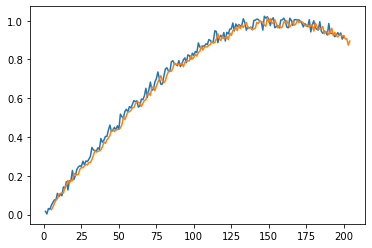

In [31]:
plt.plot(t[:200], x[:200])
plt.plot(t[tau:200+tau], pred_x[:200].detach().numpy())
plt.show()

### multistep prediction
Generally, for an observed sequence up to xt
, its predicted output xˆt+k at time step t + k is called
the k-step-ahead prediction. Since we have observed up to x604, its k-step-ahead prediction is xˆ604+k.

In [32]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train+tau] = x[:n_train+tau]

In [33]:
multistep_preds[n_train+tau:].shape # this will be all zeros

torch.Size([396])

In [34]:
multistep_preds[0:4].reshape((-1,1)).shape

torch.Size([4, 1])

In [35]:
for i in range(n_train+tau, T):
    multistep_preds[i] = net(multistep_preds[i-tau:i].reshape((-1,1)).squeeze(1))

The one-step-ahead predictions look nice, just as we expected. Even beyond 604 (n_train + tau)
observations the predictions still look trustworthy. However, there is just one little problem to
this: if we observe sequence data only until time step 604, we cannot hope to receive the inputs
for all the future one-step-ahead predictions. Instead, we need to work our way forward one step
at a time:

    xˆ605 = f(x601, x602, x603, x604),
    xˆ606 = f(x602, x603, x604, xˆ605),
    xˆ607 = f(x603, x604, xˆ605, xˆ606),
    xˆ608 = f(x604, xˆ605, xˆ606, xˆ607),
    xˆ609 = f(ˆx605, xˆ606, xˆ607, xˆ608),
. . .
(8.1.6)
Generally, for an observed sequence up to xt
, its predicted output xˆt+k at time step t + k is called
the k-step-ahead prediction. Since we have observed up to x604, its k-step-ahead prediction is xˆ604+k.

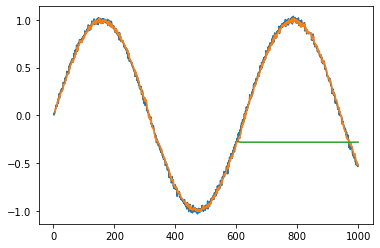

In [36]:
plt.plot(t, x)
plt.plot(t[tau:], pred_x.detach().numpy())
plt.plot(t[n_train+tau:], multistep_preds[n_train+tau:].detach().numpy())

As the above example shows, this is a spectacular failure. The predictions decay to a constant
pretty quickly after a few prediction steps. Why did the algorithm work so poorly? This is ultimately due to the fact that the errors build up. Let us say that after step 1 we have some error
ϵ1 = ¯ϵ. Now the input for step 2 is perturbed by ϵ1, hence we suffer some error in the order of
ϵ2 = ¯ϵ + cϵ1 for some constant c, and so on. The error can diverge rather rapidly from the true
observations. This is a common phenomenon. For instance, weather forecasts for the next 24
hours tend to be pretty accurate but beyond that the accuracy declines rapidly. We will discuss
methods for improving this throughout this chapter and beyond.
Let us take a closer look at the difficulties in k-step-ahead predictions by computing predictions
on the entire sequence for k = 1, 4, 16, 64.

In [37]:
max_steps = 64

### This is very confusing but
what we are doing here is essentially creating a feature array till T-tau-maxsteps+1 (933) where every column goes from tau to tau+ maxsteps(68)

In [40]:
features[:, 2-tau:2]

tensor([], size=(996, 0))

In [42]:
#net(features[:, 2-tau:2])

In [45]:
x[1:1+T-tau-max_steps + 1].shape # x[1:1+1000-4-64+1]

torch.Size([933])

In [49]:
features = torch.zeros((T-tau-max_steps+1, tau + max_steps))

# Column `i` (`i` < `tau`) are observations from `x` for time steps from
# `i + 1` to `i + T - tau - max_steps + 1`

for i in range(tau):
    features[:, i] = x[i:i + T - tau - max_steps + 1]

#till column 4


for i in range(tau,tau + max_steps):
    features[:, i] = net(features[:,i-tau:i]).reshape(-1)

# from column 4 to beyond

In [53]:
features.shape, features[:, i-tau:i].shape, net(features[:,i-tau:i]).shape

(torch.Size([933, 68]), torch.Size([933, 4]), torch.Size([933, 1]))

In [55]:
features[0]

tensor([ 1.6518e-02,  3.1942e-03,  3.1150e-02,  2.6659e-02,  2.4863e-02,
         2.3485e-02,  2.1475e-02,  1.9400e-02,  1.7024e-02,  1.4378e-02,
         1.1413e-02,  8.0928e-03,  4.3759e-03,  2.1447e-04, -4.4447e-03,
        -9.6610e-03, -1.5501e-02, -2.2040e-02, -2.9361e-02, -3.7557e-02,
        -4.6734e-02, -5.7008e-02, -6.8510e-02, -8.1389e-02, -9.5808e-02,
        -1.1195e-01, -1.3002e-01, -1.5026e-01, -1.7292e-01, -1.9828e-01,
        -2.2668e-01, -2.4575e-01, -2.5673e-01, -2.6408e-01, -2.6959e-01,
        -2.7350e-01, -2.7613e-01, -2.7791e-01, -2.7916e-01, -2.8002e-01,
        -2.8062e-01, -2.8103e-01, -2.8132e-01, -2.8151e-01, -2.8165e-01,
        -2.8174e-01, -2.8181e-01, -2.8185e-01, -2.8188e-01, -2.8191e-01,
        -2.8192e-01, -2.8193e-01, -2.8194e-01, -2.8194e-01, -2.8195e-01,
        -2.8195e-01, -2.8195e-01, -2.8195e-01, -2.8195e-01, -2.8195e-01,
        -2.8195e-01, -2.8195e-01, -2.8195e-01, -2.8195e-01, -2.8195e-01,
        -2.8195e-01, -2.8195e-01, -2.8195e-01], gra

In [56]:
features[69]

tensor([0.6445, 0.6831, 0.6412, 0.6456, 0.6393, 0.6472, 0.6414, 0.6443, 0.6414,
        0.6429, 0.6411, 0.6417, 0.6405, 0.6406, 0.6398, 0.6397, 0.6390, 0.6387,
        0.6382, 0.6378, 0.6373, 0.6369, 0.6364, 0.6360, 0.6355, 0.6350, 0.6345,
        0.6340, 0.6336, 0.6331, 0.6326, 0.6321, 0.6316, 0.6311, 0.6306, 0.6300,
        0.6295, 0.6290, 0.6285, 0.6279, 0.6274, 0.6269, 0.6263, 0.6258, 0.6252,
        0.6247, 0.6241, 0.6235, 0.6229, 0.6224, 0.6218, 0.6212, 0.6206, 0.6200,
        0.6194, 0.6188, 0.6182, 0.6175, 0.6169, 0.6163, 0.6156, 0.6150, 0.6143,
        0.6137, 0.6130, 0.6124, 0.6117, 0.6110], grad_fn=<SelectBackward>)

In [59]:
features[932].shape

torch.Size([68])

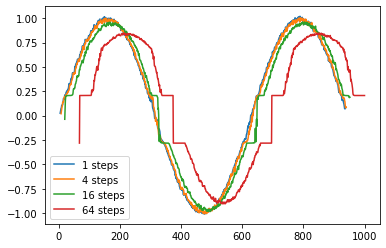

In [64]:
steps = (1,4,16,64)

for i in steps:
    plt.plot(t[tau+i-1:T-max_steps+i],features[:, tau+i-1].detach().numpy(), label=f'{i} steps')
plt.legend()
plt.show()

# step of4 is best

### Exercises

1. Improve the model in the experiment of this section.
        1. Incorporate more than the past 4 observations? How many do you really need?
            - a shift can be observed with each increasing number.
        2. How many past observations would you need if there was no noise? Hint: you can write
        sin and cos as a differential equation.
        3. Can you incorporate older observations while keeping the total number of features constant? Does this improve accuracy? Why?
        4. Change the neural network architecture and evaluate the performance.
        
2. An investor wants to find a good security to buy. He looks at past returns to decide which
one is likely to do well. What could possibly go wrong with this strategy?
    - Buying stocks are risky. Read all scheme related information carefully before investing. 
3. Does causality also apply to text? To which extent?
    - To some extent where words like the who etc are common so probability of h following w is high.
4. Give an example for when a latent autoregressive model might be needed to capture the
dynamic of the data.
    - anything that needs signal processing, like perhaps compression and expansion.

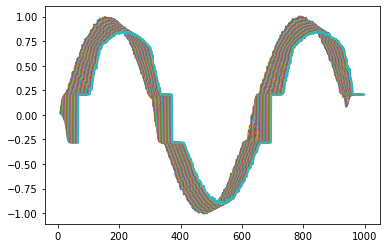

In [67]:
#1
steps=range(4,64)

for i in steps:
    plt.plot(t[tau+i-1:T-max_steps+i],features[:, tau+i-1].detach().numpy(), label=f'{i} steps')
#plt.legend()
plt.show()


# so it shifts slightly for each step increase